In [2]:
#Importing Library
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
df.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

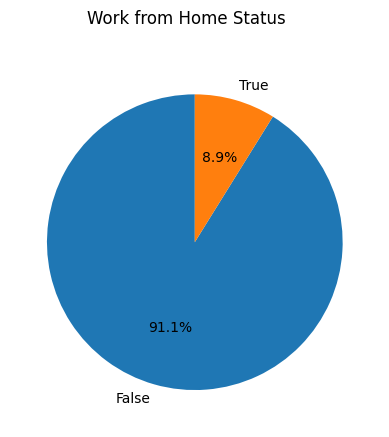

In [23]:
fig, ax = plt.subplots()

df['job_work_from_home'].value_counts().plot(kind='pie', ax=ax, startangle=90, autopct='%1.1f%%')

fig.suptitle('Work from Home Status')
ax.set_ylabel('')

plt.show()

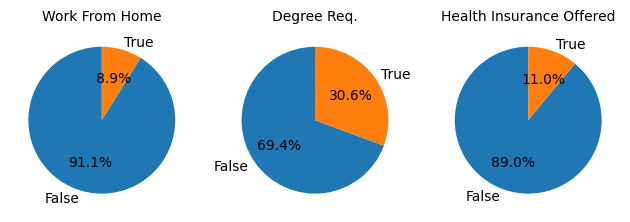

In [41]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title, fontsize='10')
fig.tight_layout()
plt.show()